In [ ]:
 import pandas as pd

df_surface17 = pd.read_csv('./data/SURFACE_air_pollution_2017.csv', encoding='cp949')
df_surface18 = pd.read_csv('./data/SURFACE_air_pollution_2018.csv', encoding='cp949')
df_pos = pd.read_csv('./data/20190509_mask_POS.csv')
df_dust = pd.read_csv('./data/df_dust_date_all.csv', encoding='euc-kr')


In [ ]:
df_dust['측정일시'] = pd.to_datetime(df_dust['측정일시'],format="%Y-%m-%d")
dust_seoul=df_dust[df_dust['지역시'] == "서울특별시"]
dust_seoul

,Unnamed: 0,측정일시,지역시,SO2,CO,O3,NO2,PM10,PM25
1,1,2017-01-01,서울특별시,0.005474,1.025386,0.003810,0.049406,80.345455,56.783784
4,4,2017-01-02,서울특별시,0.006020,0.935619,0.014191,0.045357,114.145038,78.614334
7,7,2017-01-03,서울특별시,0.005981,0.834749,0.011887,0.046610,81.069793,51.504244
10,10,2017-01-04,서울특별시,0.006046,0.942826,0.007735,0.054342,58.372973,34.362862
13,13,2017-01-05,서울특별시,0.005030,0.712959,0.009759,0.041076,38.365427,22.218644
...,...,...,...,...,...,...,...,...,...
1900,262,2018-09-26,서울특별시,0.002981,0.314762,0.026696,0.011913,8.960048,4.838902
1903,265,2018-09-27,서울특별시,0.003024,0.335613,0.023731,0.018077,10.271186,4.892252
1906,268,2018-09-28,서울특별시,0.003156,0.378646,0.015184,0.024335,14.720195,6.626214
1909,271,2018-09-29,서울특별시,0.003191,0.427928,0.016784,0.026387,17.320732,8.697080


In [ ]:
df_surface17.shape #(8760, 27)
df_surface18.shape #(8760, 27)
df_surface18.isnull().sum()

지점                  0
일시                  0
기온(°C)              1
강수량(mm)          7854
풍속(m/s)             2
풍향(16방위)            2
습도(%)              17
증기압(hPa)           10
이슬점온도(°C)          10
현지기압(hPa)           0
해면기압(hPa)           1
일조(hr)           3974
일사(MJ/m2)        3972
적설(cm)           8472
3시간신적설(cm)       8740
전운량(10분위)        1100
중하층운량(10분위)       135
운형(운형약어)         3875
최저운고(100m )      4395
시정(10m)             0
지면상태(지면상태코드)     8760
현상번호(국내식)        5852
지면온도(°C)           12
5cm 지중온도(°C)       11
10cm 지중온도(°C)      10
20cm 지중온도(°C)      11
30cm 지중온도(°C)      11
dtype: int64

In [ ]:
df_pos['날짜'] = pd.to_datetime(df_pos["Calendar Day일 2"], format ="%Y-%m-%d")
df_pos.head()

,CUSTOMER NAME,Calendar Day일 2,POS Category Code,UPC,품목명,Manufacturer,Sales Amt,Sales (Bag),Sales SU,Unit Price,박스입수,구분,유통사,SUB-CTG,수량(CS),금액,가격,지역,구군,날짜
0,(주)지에스리테일 본부,2017-01-01,MP,8.801166e+12,CNX 황사마스크 대형1P,UKM Company,49000.0,27,27.0,1815.0,50,POS,(주)지에스리테일 본부,MP,0.5,49000,1815,경기도,평택시,2017-01-01
1,(주)지에스리테일 본부,2017-01-01,MG,8.801166e+12,UKM 크리넥스 입체마스크 성인용 3P 6G x 3EA,UKM Company,84000.0,28,0.0,3000.0,50,POS,(주)지에스리테일 본부,MG,0.6,84000,3000,경기도,평택시,2017-01-01
2,(주)지에스리테일 본부,2017-01-01,MG,8.801166e+12,UKM 크리넥스 입체마스크 어린이용 3P 6Gx3EA,UKM Company,57000.0,20,0.0,2850.0,50,POS,(주)지에스리테일 본부,MG,0.4,57000,2850,경기도,평택시,2017-01-01
3,(주)지에스리테일 본부,2017-01-01,MG,8.801166e+12,CNX 황사마스크 성인용3P,UKM Company,2600.0,1,1.0,2600.0,50,POS,(주)지에스리테일 본부,MG,0.0,2600,2600,경기도,포천시,2017-01-01
4,(주)지에스리테일 본부,2017-01-01,MP,8.801166e+12,CNX KF94 방역용 마스크 1입,UKM Company,5000.0,2,2.0,2500.0,50,POS,(주)지에스리테일 본부,MP,0.0,5000,2500,경기도,포천시,2017-01-01


In [ ]:
df_posSales = df_pos.groupby('날짜',as_index=False)[['Sales (Bag)','Sales Amt']].sum()
df_posSales

,날짜,Sales (Bag),Sales Amt
0,2017-01-01,2050,7482160.0
1,2017-01-02,2684,8796124.0
2,2017-01-03,2670,9500876.0
3,2017-01-04,2326,8284787.0
4,2017-01-05,1756,6283747.0
...,...,...,...
787,2019-02-27,1027,3698369.0
788,2019-02-28,1745,6872981.0
789,2019-03-01,3622,15795477.0
790,2019-03-02,4266,18917615.0


In [ ]:
df_surface = pd.concat([df_surface17, df_surface18], ignore_index=True)
df_surface.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지점             17520 non-null  int64  
 1   일시             17520 non-null  object 
 2   기온(°C)         17515 non-null  float64
 3   강수량(mm)        1723 non-null   float64
 4   풍속(m/s)        17474 non-null  float64
 5   풍향(16방위)       17474 non-null  float64
 6   습도(%)          17499 non-null  float64
 7   증기압(hPa)       17508 non-null  float64
 8   이슬점온도(°C)      17508 non-null  float64
 9   현지기압(hPa)      17515 non-null  float64
 10  해면기압(hPa)      17516 non-null  float64
 11  일조(hr)         9529 non-null   float64
 12  일사(MJ/m2)      9528 non-null   float64
 13  적설(cm)         708 non-null    float64
 14  3시간신적설(cm)     54 non-null     float64
 15  전운량(10분위)      14483 non-null  float64
 16  중하층운량(10분위)    17309 non-null  float64
 17  운형(운형약어)       9590 non-null   object 
 18  최저운고(1

In [ ]:
df_surface['일시'] = pd.to_datetime(df_surface['일시'], format = '%Y-%m-%d %H:%M')
df_surface['날짜'] = df_surface['일시'].dt.strftime('%Y-%m-%d')
df_surface.head(5)

,지점,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),...,최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),날짜
0,108,2017-01-01 00:00:00,0.2,NaN,2.2,20.0,79.0,4.9,-3.0,1018.8,...,8.0,491,NaN,40.0,-0.9,0.1,0.3,1.7,2.6,2017-01-01
1,108,2017-01-01 01:00:00,0.0,NaN,1.4,20.0,78.0,4.8,-3.3,1018.9,...,7.0,549,NaN,40.0,-0.9,0.0,0.3,1.7,2.6,2017-01-01
2,108,2017-01-01 02:00:00,-0.3,NaN,1.9,50.0,81.0,4.9,-3.1,1018.5,...,8.0,483,NaN,4019.0,-1.8,0.0,0.3,1.7,2.6,2017-01-01
3,108,2017-01-01 03:00:00,-0.7,NaN,2.0,50.0,84.0,4.9,-3.0,1018.8,...,NaN,436,NaN,19.0,-2.1,0.0,0.3,1.7,2.7,2017-01-01
4,108,2017-01-01 04:00:00,-1.1,NaN,1.6,20.0,85.0,4.8,-3.3,1018.6,...,NaN,430,NaN,19.0,-2.4,-0.1,0.4,1.7,2.6,2017-01-01


In [ ]:
df_surface[df_surface['날짜'] == '2017-01-01']['기온(°C)'].min(axis=0)
df_surface[df_surface['날짜'] == '2017-01-01']['기온(°C)'].max(axis=0)
df_surface[df_surface['날짜'] == '2017-01-01']['기온(°C)'].mean(axis=0)


2.4041666666666663

In [ ]:
# surface_temp.groupby('날짜', as_index = False). agg({'기온(°C)':'mean','기온':'max'})
surface = df_surface.groupby('날짜', as_index = False).agg(['mean','max','min'])
surface_temp=surface.loc[:,['기온(°C)','습도(%)']]
surface_temp['Day'] = surface_temp.index
surface_temp['Day'] = pd.to_datetime(surface_temp['Day'], format="%Y-%m-%d")
surface_temp

C:\Users\82106\AppData\Local\Temp\ipykernel_28560\2245229820.py:2: FutureWarning: ['운형(운형약어)'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  surface = df_surface.groupby('날짜', as_index = False).agg(['mean','max','min'])


기온(°C)                 습도(%)                    Day
                 mean  max   min       mean   max   min           
날짜                                                                
2017-01-01   2.404167  6.9  -1.5  75.875000  87.0  61.0 2017-01-01
2017-01-02   5.241667  9.2   2.8  76.875000  89.0  59.0 2017-01-02
2017-01-03   2.108333  7.2  -2.1  62.416667  83.0  39.0 2017-01-03
2017-01-04   4.037500  8.7   1.0  58.083333  77.0  32.0 2017-01-04
2017-01-05   3.600000  7.2   0.1  52.041667  60.0  43.0 2017-01-05
...               ...  ...   ...        ...   ...   ...        ...
2018-12-27  -9.633333 -7.0 -12.0  26.791667  47.0  16.0 2018-12-27
2018-12-28 -10.804167 -6.9 -14.2  33.458333  48.0  24.0 2018-12-28
2018-12-29  -7.575000 -3.1 -10.4  28.833333  42.0  19.0 2018-12-29
2018-12-30  -7.020833 -0.9 -11.2  36.416667  51.0  24.0 2018-12-30
2018-12-31  -5.608333 -0.6 -10.3  39.000000  56.0  18.0 2018-12-31

[730 rows x 7 columns]

In [ ]:
#merge_outer = pd.merge(df1,df2, how='outer',on='id')
merge_mask = pd.merge(surface_temp,df_posSales, left_on="Day", right_on="날짜", how="left")
merge_mask.isnull().sum()
merge_mask.columns
merge_mask.head()

C:\Users\82106\AppData\Local\Temp\ipykernel_28560\3114447958.py:2: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  merge_mask = pd.merge(surface_temp,df_posSales, left_on="Day", right_on="날짜", how="left")


,"(기온(°C), mean)","(기온(°C), max)","(기온(°C), min)","(습도(%), mean)","(습도(%), max)","(습도(%), min)","(Day, )",날짜,Sales (Bag),Sales Amt
0,2.404167,6.9,-1.5,75.875000,87.0,61.0,2017-01-01,2017-01-01,2050,7482160.0
1,5.241667,9.2,2.8,76.875000,89.0,59.0,2017-01-02,2017-01-02,2684,8796124.0
2,2.108333,7.2,-2.1,62.416667,83.0,39.0,2017-01-03,2017-01-03,2670,9500876.0
3,4.037500,8.7,1.0,58.083333,77.0,32.0,2017-01-04,2017-01-04,2326,8284787.0
4,3.600000,7.2,0.1,52.041667,60.0,43.0,2017-01-05,2017-01-05,1756,6283747.0


In [ ]:
merge_mask.columns

Index([('기온(°C)', 'mean'),  ('기온(°C)', 'max'),  ('기온(°C)', 'min'),
        ('습도(%)', 'mean'),   ('습도(%)', 'max'),   ('습도(%)', 'min'),
              ('Day', ''),               '날짜',      'Sales (Bag)',
              'Sales Amt'],
      dtype='object')

In [ ]:
surfaceFinal = merge_mask[['날짜']]
surfaceFinal['기온_mean'] = merge_mask[('기온(°C)', 'mean')]
surfaceFinal['기온_max'] = merge_mask[('기온(°C)', 'max')]
surfaceFinal['기온_min'] = merge_mask[('기온(°C)', 'min')]
surfaceFinal['습도_mean'] = merge_mask[('습도(%)', 'mean')]
surfaceFinal['습도_max'] = merge_mask[('습도(%)', 'max')]
surfaceFinal['습도_min'] = merge_mask[('습도(%)', 'min')]
surfaceFinal['판매량(개)'] = merge_mask['Sales (Bag)']
surfaceFinal['매출액'] = merge_mask['Sales Amt']
surfaceFinal

C:\Users\82106\AppData\Local\Temp\ipykernel_28560\2259453256.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  surfaceFinal['기온_mean'] = merge_mask[('기온(°C)', 'mean')]
C:\Users\82106\AppData\Local\Temp\ipykernel_28560\2259453256.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  surfaceFinal['기온_max'] = merge_mask[('기온(°C)', 'max')]
C:\Users\82106\AppData\Local\Temp\ipykernel_28560\2259453256.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

,날짜,기온_mean,기온_max,기온_min,습도_mean,습도_max,습도_min,판매량(개),매출액
0,2017-01-01,2.404167,6.9,-1.5,75.875000,87.0,61.0,2050,7482160.0
1,2017-01-02,5.241667,9.2,2.8,76.875000,89.0,59.0,2684,8796124.0
2,2017-01-03,2.108333,7.2,-2.1,62.416667,83.0,39.0,2670,9500876.0
3,2017-01-04,4.037500,8.7,1.0,58.083333,77.0,32.0,2326,8284787.0
4,2017-01-05,3.600000,7.2,0.1,52.041667,60.0,43.0,1756,6283747.0
...,...,...,...,...,...,...,...,...,...
725,2018-12-27,-9.633333,-7.0,-12.0,26.791667,47.0,16.0,3006,9572798.0
726,2018-12-28,-10.804167,-6.9,-14.2,33.458333,48.0,24.0,2611,8497643.0
727,2018-12-29,-7.575000,-3.1,-10.4,28.833333,42.0,19.0,3650,12095559.0
728,2018-12-30,-7.020833,-0.9,-11.2,36.416667,51.0,24.0,2863,9224201.0


In [ ]:
surface_realFinal = pd.merge(surfaceFinal,dust_seoul, left_on ="날짜", right_on="측정일시", how='left')
surface_realFinal.isnull().sum() #92
surface_realFinal.shape #(730, 19)
surface_realFinal['Month'] = surface_realFinal['날짜'].dt.strftime("%Y-%m")
surface_realFinal[surface_realFinal.isna( ).any(axis=1)]
# surface_realFinal.dropna(axis=0, inplace=True)

,날짜,기온_mean,기온_max,기온_min,습도_mean,습도_max,습도_min,판매량(개),매출액,Unnamed: 0,측정일시,지역시,SO2,CO,O3,NO2,PM10,PM25,Month
638,2018-10-01,15.437500,19.3,13.1,54.250000,69.0,36.0,1265,3346903.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10
639,2018-10-02,15.783333,21.8,10.4,60.791667,82.0,36.0,1063,2809119.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10
640,2018-10-03,17.241667,24.1,11.2,59.125000,85.0,34.0,1255,3307604.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10
641,2018-10-04,18.895833,25.3,13.2,56.833333,75.0,38.0,1033,2946069.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10
642,2018-10-05,17.095833,19.0,15.8,81.333333,97.0,55.0,821,2462280.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2018-12-27,-9.633333,-7.0,-12.0,26.791667,47.0,16.0,3006,9572798.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-12
726,2018-12-28,-10.804167,-6.9,-14.2,33.458333,48.0,24.0,2611,8497643.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-12
727,2018-12-29,-7.575000,-3.1,-10.4,28.833333,42.0,19.0,3650,12095559.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-12
728,2018-12-30,-7.020833,-0.9,-11.2,36.416667,51.0,24.0,2863,9224201.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-12


In [ ]:
surfaceFinal['Month'] = surfaceFinal['날짜'].dt.strftime("%Y-%m")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 그래프에 한글 폰트 설정
plt.rcParams['font.family']='Malgun Gothic'

# 그래프에 마이너스 기호 깨지는 문제 해결
plt.rcParams['axes.unicode_minus']=False

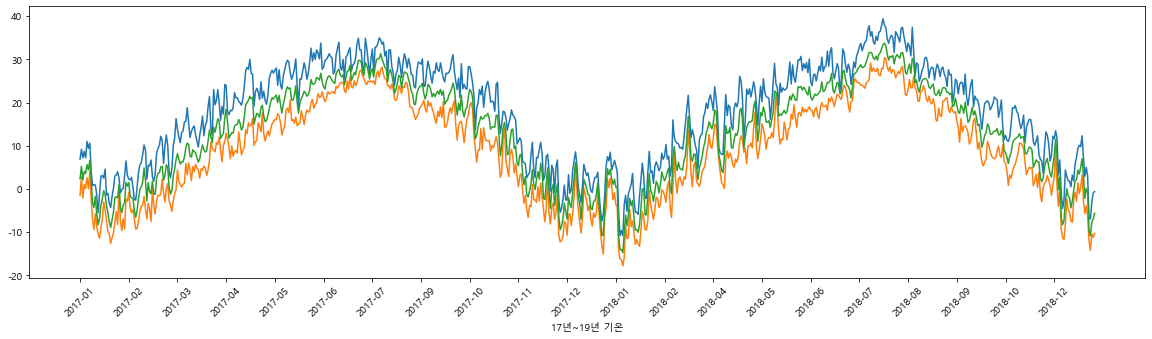

In [ ]:
plt.figure(figsize = (20, 5))

x = surfaceFinal['날짜'].to_list()
xlabels = surfaceFinal['Month']
y1 =surfaceFinal['기온_max'].to_list()
y2 =surfaceFinal['기온_min'].to_list()
y3 =surfaceFinal['기온_mean'].to_list()
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.xticks(ticks=x, labels=xlabels, rotation=45)
plt.xlabel('17년~19년 기온')
plt.locator_params(axis='x', nbins=len(xlabels)/35)

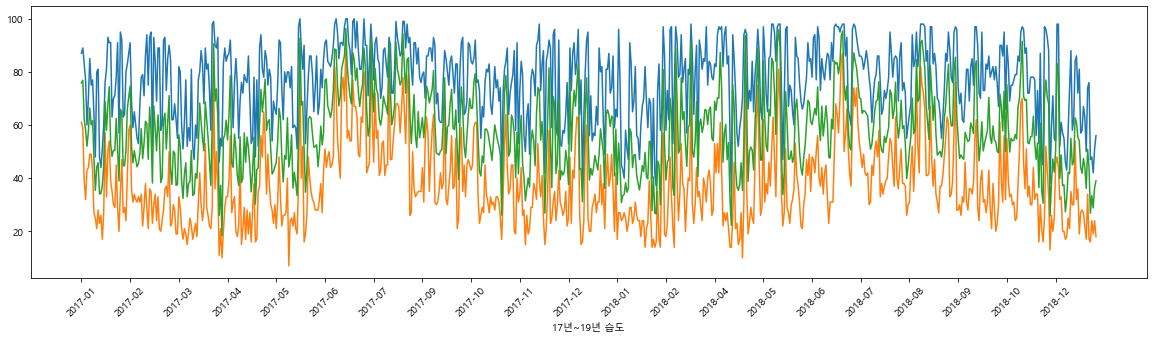

In [ ]:
plt.figure(figsize = (20, 5))

x = surfaceFinal['날짜'].to_list()
xlabels = surfaceFinal['Month']
y1 =surfaceFinal['습도_max'].to_list()
y2 =surfaceFinal['습도_min'].to_list()
y3 =surfaceFinal['습도_mean'].to_list()
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.xticks(ticks=x, labels=xlabels, rotation=45)
plt.xlabel('17년~19년 습도')
plt.locator_params(axis='x', nbins=len(xlabels)/35)

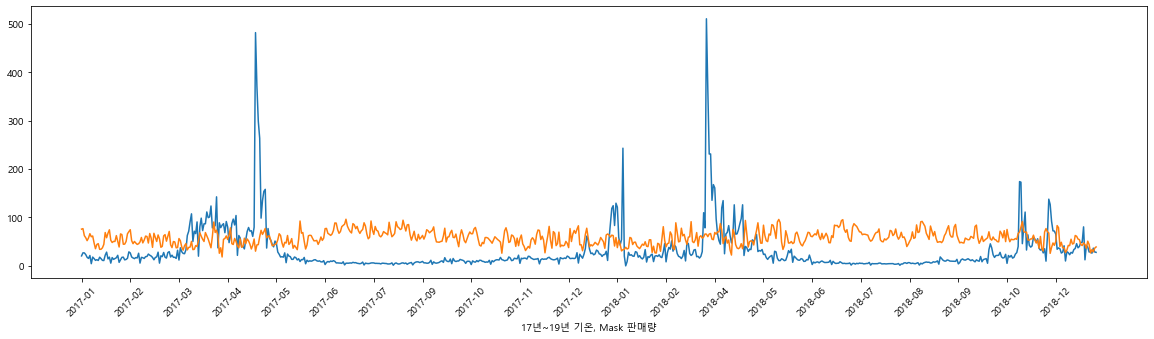

In [ ]:
plt.figure(figsize = (20, 5))

x = surfaceFinal['날짜'].to_list()
xlabels = surfaceFinal['Month']
y1 =(surfaceFinal['판매량(개)']/100).to_list() # 마스크 판매량 /100개 
y2 =surfaceFinal['습도_mean'].to_list()
plt.plot(x, y1)
plt.plot(x, y2)
plt.xticks(ticks=x, labels=xlabels, rotation=45)
plt.xlabel('17년~19년 기온, Mask 판매량')
plt.locator_params(axis='x', nbins=len(xlabels)/35)

In [ ]:
surface_realFinal

,날짜,기온_mean,기온_max,기온_min,습도_mean,습도_max,습도_min,판매량(개),매출액,Unnamed: 0,측정일시,지역시,SO2,CO,O3,NO2,PM10,PM25,Month
0,2017-01-01,2.404167,6.9,-1.5,75.875000,87.0,61.0,2050,7482160.0,1.0,2017-01-01,서울특별시,0.005474,1.025386,0.003810,0.049406,80.345455,56.783784,2017-01
1,2017-01-02,5.241667,9.2,2.8,76.875000,89.0,59.0,2684,8796124.0,4.0,2017-01-02,서울특별시,0.006020,0.935619,0.014191,0.045357,114.145038,78.614334,2017-01
2,2017-01-03,2.108333,7.2,-2.1,62.416667,83.0,39.0,2670,9500876.0,7.0,2017-01-03,서울특별시,0.005981,0.834749,0.011887,0.046610,81.069793,51.504244,2017-01
3,2017-01-04,4.037500,8.7,1.0,58.083333,77.0,32.0,2326,8284787.0,10.0,2017-01-04,서울특별시,0.006046,0.942826,0.007735,0.054342,58.372973,34.362862,2017-01
4,2017-01-05,3.600000,7.2,0.1,52.041667,60.0,43.0,1756,6283747.0,13.0,2017-01-05,서울특별시,0.005030,0.712959,0.009759,0.041076,38.365427,22.218644,2017-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2018-12-27,-9.633333,-7.0,-12.0,26.791667,47.0,16.0,3006,9572798.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-12
726,2018-12-28,-10.804167,-6.9,-14.2,33.458333,48.0,24.0,2611,8497643.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-12
727,2018-12-29,-7.575000,-3.1,-10.4,28.833333,42.0,19.0,3650,12095559.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-12
728,2018-12-30,-7.020833,-0.9,-11.2,36.416667,51.0,24.0,2863,9224201.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-12


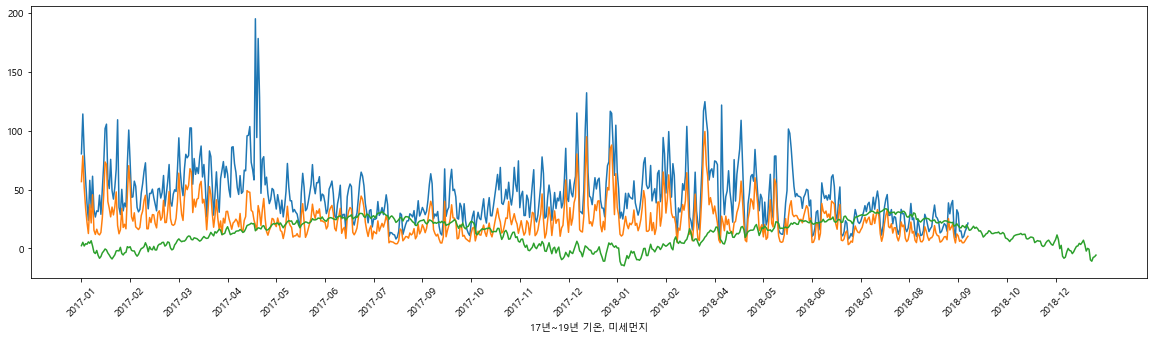

In [ ]:
plt.figure(figsize = (20, 5))

x = surface_realFinal['날짜'].to_list()
xlabels = surface_realFinal['Month']
y1 =(surface_realFinal['PM10'] ).to_list() 
y2 =(surface_realFinal['PM25'] ).to_list() 
y3 =surface_realFinal['기온_mean'].to_list()
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.xticks(ticks=x, labels=xlabels, rotation=45)
plt.xlabel('17년~19년 기온, 미세먼지')
plt.locator_params(axis='x', nbins=len(xlabels)/35)


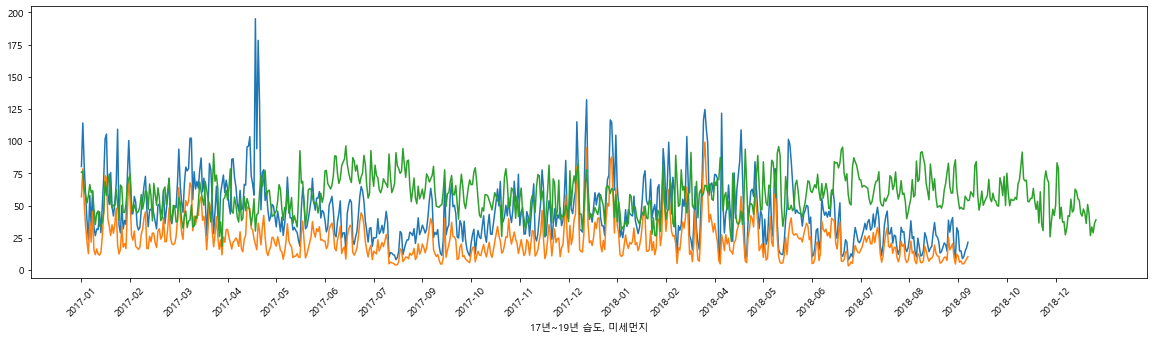

In [ ]:
plt.figure(figsize = (20, 5))

x = surface_realFinal['날짜'].to_list()
xlabels = surface_realFinal['Month']
y1 =(surface_realFinal['PM10'] ).to_list() 
y2 =(surface_realFinal['PM25'] ).to_list() 
y3 =surface_realFinal['습도_mean'].to_list()
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.xticks(ticks=x, labels=xlabels, rotation=45)
plt.xlabel('17년~19년 습도, 미세먼지')
plt.locator_params(axis='x', nbins=len(xlabels)/35)

In [ ]:
# from datetime import datetime

# def date_range(start, end):
#     start = datetime.strptime(start, "%Y-%m-%d")
#     end = datetime.strptime(end, "%Y-%m-%d")
#     dates = [date.strftime("%Y-%m-%d") for date in pd.date_range(start, periods=(end-start).days+1)]
#     return dates
    
# dates = date_range("2017-01-01", "2018-12-31") # 날짜 리스트로 만들기

In [ ]:
# for date in dates:
#     if (surface_temp['날짜'] == date):
#         surface_temp['기온min'] = df_surface[df_surface['날짜']==date]['기온(°C)'].min(axis=0)
    #     surface_temp.iloc[i]['기온max'] = df_surface[df_surface['날짜']==date]['기온(°C)'].max(axis=0)
        # surface_temp['기온min'] = df_surface[df_surface['날짜']==date]['기온(°C)'].min(axis=0)

In [ ]:
# for date in dates:
#     for i in range(0, surface_temp.shape[0]):
#         print(df_surface['날짜']==date)
        # if (surface_temp.iloc[i]['날짜'] == date):
        #     surface_temp.iloc[i]['기온max'] = df_surface[df_surface['날짜']==date]['기온(°C)'].max(axis=0)
            # surface_temp['기온min'] = df_surface[df_surface['날짜']==date]['기온(°C)'].min(axis=0)



In [ ]:
# surface_temp.tail()

In [ ]:
# surface_temp['날짜'] == date